<a href="https://colab.research.google.com/github/rifqij/dataMining/blob/main/UasDataMiningUSK2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rifqij/dataMining.git

Cloning into 'dataMining'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
# Load data
import pandas as pd
df = pd.read_csv("/content/dataMining/classification15.csv")
df.head()

,SEQN,DEMO.RIDAGEYR,DEMO.RIAGENDR,DEMO.RIDRETH1,DEMO.DMDEDUC2,DEMO.INDHHINC,LAB10AM.LBXGLU,MCQ.MCQ250A,WHQ.WHD010,WHQ.WHD020,BPQ.BPQ020,SMQ.SMQ020,ALQ.ALQ100,BMX.BMXWAIST,BMX.BMXBMI,labels
0,2,77,1,3,5.0,8.0,83.7,2.0,69.0,168.0,2.0,2.0,1.0,98.0,24.90,cases
1,5,49,1,3,5.0,11.0,99.9,2.0,71.0,206.0,1.0,1.0,1.0,99.9,29.10,cases
2,7,59,2,4,2.0,NaN,85.6,1.0,65.0,176.0,1.0,1.0,2.0,90.7,29.39,cases
3,10,43,1,4,3.0,NaN,89.8,9.0,75.0,200.0,2.0,1.0,1.0,108.0,30.94,cases
4,12,37,1,3,4.0,11.0,82.9,1.0,70.0,222.0,1.0,2.0,1.0,112.8,30.62,cases


questions_diabetes_metadata.txt
1.   Demographics 	- DEMO.SEQN [Primary key]
2. Questionnaire 	- DIQ.DIQ010 [Doctor told you has diabetes]
3. Lab 		- LAB10AM.LBXGLU [blood glucose level]
4. Q 		- MCQ.MCQ250A [family history of diabetes]
5. DEMO 		- DEMO.RIDAGEYR [Age]
6. DEMO 		- DEMO.RIAGENDR [Gender]
7. DEMO 		- DEMO.RIDRETH1 [Race]
8. Q 		- WHQ.WHD010 [height]
9. Q 		- WHQ.WHD020 [weight]
10. Exam 		- BMX.BMXWAIST [waist circumference]
11. Exam 		- BMX.BMXBMI [Body mass index]
12. Q 		- BPQ.BPQ020 [Hypertension or high blood pressure]
13. Q 		- PAQ.PAQ180 [Avg. level of physical ativity each day]
14. Q 		- SMQ.SMQ020 [Smoker/ smoked at least 100 cigarettes in life]
15. Q 		- ALQ.ALQ100 [alcohol / had at least 23 drinks per year]
16. Demo 		- DEMO.DMDEDUC2 [education]




1. SVM

In [ ]:
# SVM
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Cleaning (drop baris dengan NaN) dan Partisi data (30% untuk data testing)
from sklearn.model_selection import train_test_split

df1 = df.dropna()
X = df1.loc[:, df1.columns != 'labels']
y = df1.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(len(X_train))
print(len(X_test))

11113
4763


In [ ]:
# fit model svm dengan train data
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
# Melihat performa model berdasarkan confusion matrix
# Diperoleh akurasi sebesar 99.0762%
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[2879   12]
 [  32 1840]]
Test Set: 4763
Accuracy = 99.07621247113164 %


2. Association Rule

In [ ]:
#Association Rule
!pip install apyori  #This instals the Apyori package for using the Association Mining Apriori algorithm

import numpy as np
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2fe46cc222fa96950fc55344de949899741ae00e773ee84669e1a5ad9e8c7292
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
# Melakukan normalisasi pada data yang telah di clean (drop NaN)
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(df1.drop('labels', axis=1))

# Use scaler object to conduct a transforms
scaled_features = scaler.transform(df1.drop('labels',axis=1))
# Review the array of values generated from the scaled features process
scaled_features

array([[-1.8248519 ,  1.62541335, -1.02319666, ..., -0.59925847,
         0.0418742 , -0.54511328],
       [-1.82473849,  0.06506371, -1.02319666, ..., -0.59925847,
         0.16565999,  0.11912392],
       [-1.82447386, -0.60365757, -1.02319666, ..., -0.59925847,
         1.00610036,  0.35951453],
       ...,
       [ 1.7158898 , -0.49220402, -1.02319666, ...,  1.55905086,
        -0.31645309, -0.37114639],
       [ 1.71638124, -0.77083789,  0.97732922, ..., -0.59925847,
        -0.91583692, -0.97212291],
       [ 1.7170617 ,  1.56968658,  0.97732922, ...,  1.55905086,
        -0.15357705, -1.08282911]])

In [ ]:
df_svm = pd.DataFrame(scaled_features, columns=df1.columns[:-1])
df_svm.head()

,SEQN,DEMO.RIDAGEYR,DEMO.RIAGENDR,DEMO.RIDRETH1,DEMO.DMDEDUC2,DEMO.INDHHINC,LAB10AM.LBXGLU,MCQ.MCQ250A,WHQ.WHD010,WHQ.WHD020,BPQ.BPQ020,SMQ.SMQ020,ALQ.ALQ100,BMX.BMXWAIST,BMX.BMXBMI
0,-1.824852,1.625413,-1.023197,0.081458,1.250420,-0.145042,-0.853687,0.230247,-0.120194,-0.055991,0.573372,0.852873,-0.599258,0.041874,-0.545113
1,-1.824738,0.065064,-1.023197,0.081458,1.250420,0.094996,-0.006608,0.230247,-0.118519,-0.044644,-1.371682,-1.000934,-0.599258,0.165660,0.119124
2,-1.824474,-0.603658,-1.023197,0.081458,0.467595,0.094996,-0.895518,-0.657850,-0.119357,-0.039866,-1.371682,0.852873,-0.599258,1.006100,0.359515
3,-1.824360,-0.547931,0.977329,0.081458,1.250420,-0.145042,-0.064126,0.230247,-0.120194,-0.055394,0.573372,-1.000934,-0.599258,-0.694326,-0.263603
4,-1.824171,-1.383832,0.977329,-1.712192,-1.880882,-0.305067,-0.492894,-0.657850,-0.126895,-0.066442,0.573372,-1.000934,-0.599258,-1.065683,-0.738058


In [ ]:
# split the data
from sklearn.model_selection import train_test_split
# reset the X
X = df_svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_train))
print(len(X_test))

11113
4763


In [ ]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=1)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)
# Review the predictions
pred

array(['non-cases', 'non-cases', 'cases', ..., 'cases', 'cases', 'cases'],
      dtype=object)

In [ ]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       cases       0.82      0.84      0.83      2917
   non-cases       0.73      0.70      0.72      1846

    accuracy                           0.78      4763
   macro avg       0.77      0.77      0.77      4763
weighted avg       0.78      0.78      0.78      4763



In [ ]:
# Print confusion matrix
# diperoleh akurasi 78.4799%
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 2441
FP - False Positive 476
FN - False Negative 549
TP - True Positive 1297
Accuracy Rate: 0.7847994961158934
Misclassification Rate: 0.21520050388410666


In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

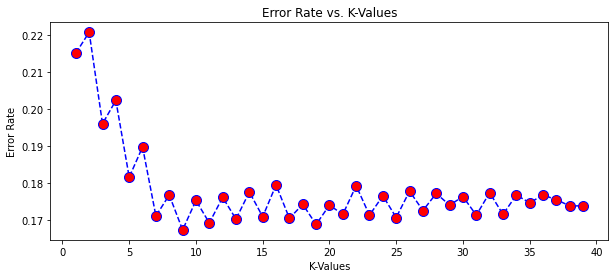

In [ ]:
# Evaluasi nilai k terbaik
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [ ]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       cases       0.82      0.92      0.87      2917
   non-cases       0.85      0.68      0.76      1846

    accuracy                           0.83      4763
   macro avg       0.83      0.80      0.81      4763
weighted avg       0.83      0.83      0.82      4763



In [ ]:
# confusion matrix baru
# diperoleh akurasi lebih baik sebesar 82.9099%
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 2693
FP - False Positive 224
FN - False Negative 590
TP - True Positive 1256
Accuracy Rate: 0.8290993071593533
Misclassification Rate: 0.17090069284064666
